In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk import ngrams
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 200
sns.set_style('dark')

In [2]:
!pip install wordcloud

In [3]:
from wordcloud import WordCloud

# Problem Statement
Perform sentimental analysis on the Elon-musk tweets.

In [4]:
# Importing Dataset
tweets = pd.read_csv("E:\Data Science\Assignments\Text Mining\Elon_musk.csv",encoding='ISO 8859-1' , index_col = 0)

In [5]:
tweets.head(10)

,Text
1,@kunalb11 Im an alien
2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
3,@joerogan @Spotify Great interview!
4,@gtera27 Doge is underestimated
5,@teslacn Congratulations Tesla China for amazi...
6,Happy New Year of the Ox! https://t.co/9WFKMYu2oj
7,"Frodo was the underdoge,\nAll thought he would..."
8,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)
9,@flcnhvy @anonyx10 Indeed! Tweets definitely d...
10,The most entertaining outcome is the most likely


In [6]:
len(tweets.index)

1999

In [7]:
tweets["Tweets"] = tweets["Text"] 

In [8]:
from collections import Counter
import nltk
import string
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
# RegEx for stopwords, Replace the symbol, '|' with ' ' 
#dropping all the stopwords and generate DF out of Counter
top_N = 100
stopwords = nltk.corpus.stopwords.words('english')
stopwords = stopwords + ['rt']
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))
words = (tweets.Tweets
           .str.lower()
           .replace([r'\|', RE_stopwords], [' ', ''], regex=True)
           .str.cat(sep=' ')
           .split()
)

words_data = pd.DataFrame(Counter(words).most_common(300),
                    columns=['Word', 'Frequency']).set_index('Word')

In [10]:
words_data

,Frequency
Word,
,243
&amp;,218
@erdayastronaut,140
@spacex,140
@ppathole,123
...,...
watch,7
<u+2192>,7
progress,7


In [11]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Performing the sentiment analysis with VADER Sentiment Analyzer. 

In [12]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Text(0, 0.5, 'Count')

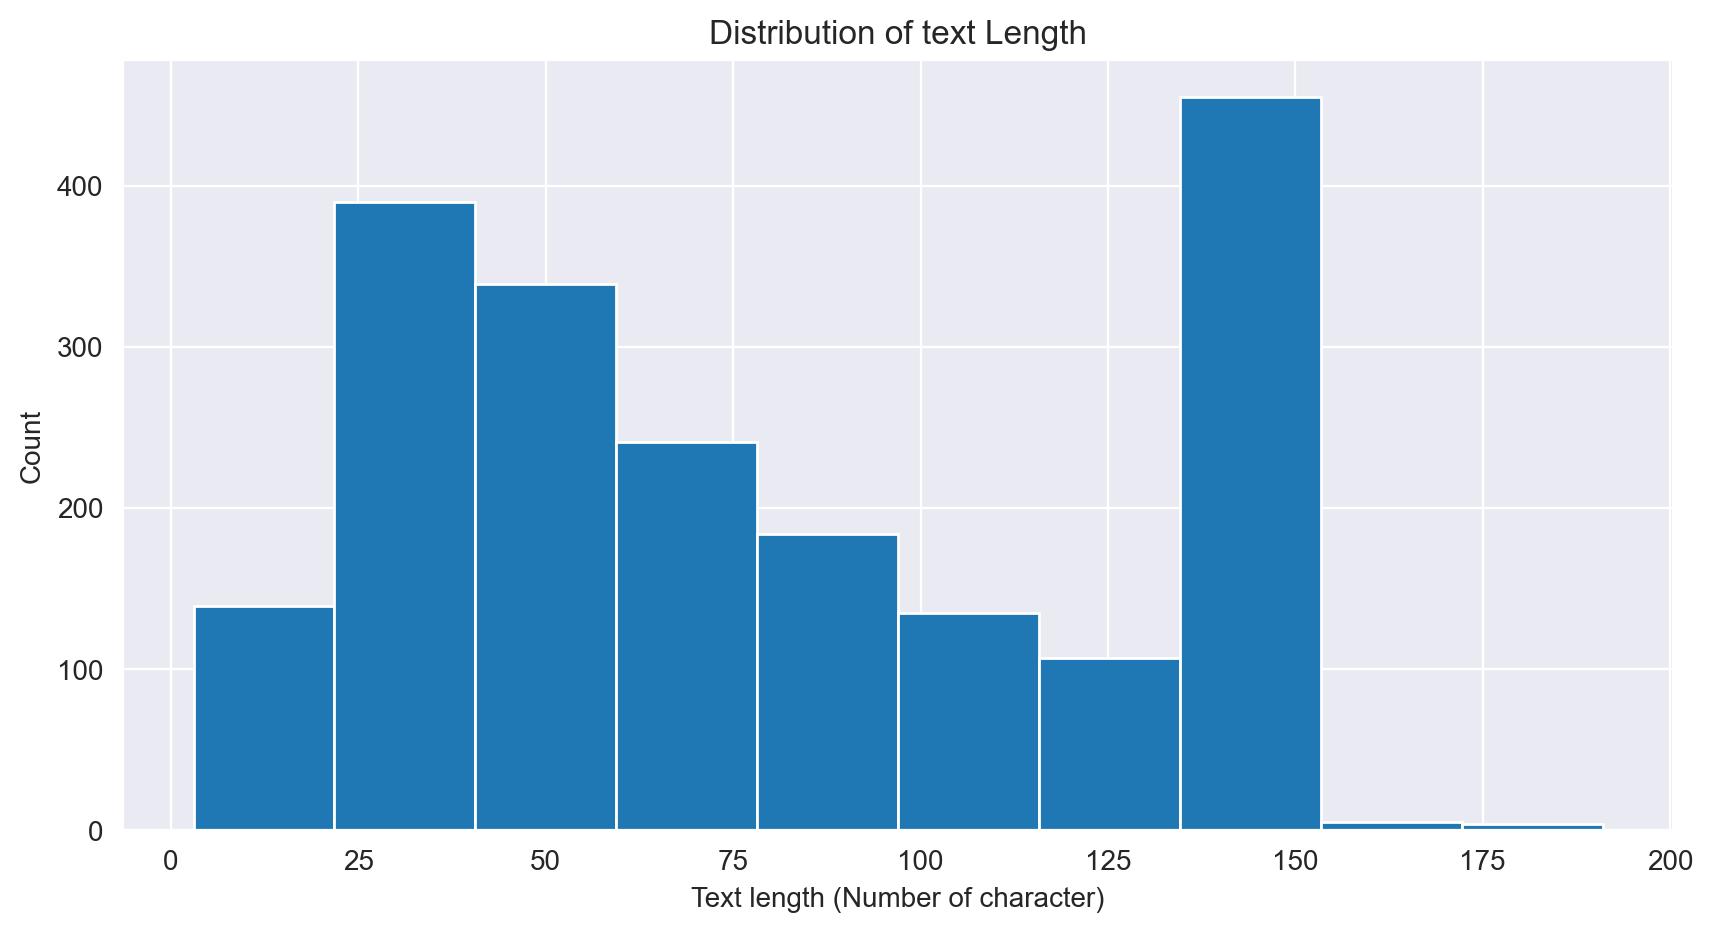

In [13]:
text_length = tweets["Tweets"].dropna().map(lambda x: len(x))
text_length.loc[text_length < 1500].hist()
plt.title("Distribution of text Length")
plt.xlabel('Text length (Number of character)')
plt.ylabel('Count')

### Cleaning the input tweets for betting understanding to the Machine
### 1) converting to lowercase 
###  2) Removing ht e punctuations
###  3)Removing Numbers from the tweets

In [14]:
tweets["Tweets"]= tweets["Tweets"].apply(lambda x: " ".join(word.lower() for word in x.split()))

In [15]:
import string
tweets["Tweets"]=tweets["Tweets"].apply(lambda x:''.join([i for i in x  if i not in string.punctuation]))

In [16]:
tweets["Tweets"]=tweets["Tweets"].str.replace('[0-9]','')

In [17]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
stop_words=stopwords.words('english')

In [19]:
tweets["Tweets"]=tweets["Tweets"].apply(lambda x: " ".join(word for word in x.split() if word not in stop_words))

In [20]:
import re
import string
'''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
def clean_text(Tweets):
    Tweets = Tweets.lower()
    Tweets = re.sub('\[.*?\]', '', text)
    data = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    Tweets = re.sub('\w*\d\w*', '', text)
    Tweets = re.sub("[0-9" "]+"," ",text)
    Tweets = re.sub('[‘’“”…]', '', text)
    return Tweets
clean = lambda x: clean_Tweets(x)

In [21]:
tweets.head(10)

,Text,Tweets
1,@kunalb11 Im an alien,kunalb im alien
2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,idaacarmack ray tracing cyberpunk hdr nextleve...
3,@joerogan @Spotify Great interview!,joerogan spotify great interview
4,@gtera27 Doge is underestimated,gtera doge underestimated
5,@teslacn Congratulations Tesla China for amazi...,teslacn congratulations tesla china amazing ex...
6,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,happy new year ox httpstcowfkmyuoj
7,"Frodo was the underdoge,\nAll thought he would...",frodo underdoge thought would fail httpstcozgx...
8,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),owensparks flcnhvy anonyx haha thanks
9,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,flcnhvy anonyx indeed tweets definitely repres...
10,The most entertaining outcome is the most likely,entertaining outcome likely


In [22]:
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [23]:
from textblob import Word
tweets["Tweets"]= tweets["Tweets"].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [24]:
import re
pattern = r"((?<=^)|(?<= )).((?=$)|(?= ))"
tweets["Tweets"]= tweets["Tweets"].apply(lambda x:(re.sub(pattern, '',x).strip()))

In [25]:
Tweets_set=tweets["Tweets"]

###  Removing  the emojis by using  user defined function

In [26]:
import re
import sys

def remove_emoji(Tweets_set):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F" 
                           u"\U0001F300-\U0001F5FF" 
                           u"\U0001F680-\U0001F6FF"  
                           u"\U0001F1E0-\U0001F1FF"  
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [27]:
def remove_emoji(Tweets_set):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F" 
                               u"\U0001F300-\U0001F5FF" 
                               u"\U0001F680-\U0001F6FF" 
                               u"\U0001F1E0-\U0001F1FF"  
                               u"\U00002500-\U00002BEF" 
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
X = vec.fit_transform(tweets["Tweets"])
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())
print(df)

      aber  able  abo  aboard  abort  absence  absolute  absolutely  absorb  \
0        0     0    0       0      0        0         0           0       0   
1        0     0    0       0      0        0         0           0       0   
2        0     0    0       0      0        0         0           0       0   
3        0     0    0       0      0        0         0           0       0   
4        0     0    0       0      0        0         0           0       0   
...    ...   ...  ...     ...    ...      ...       ...         ...     ...   
1994     0     0    0       0      0        0         0           0       0   
1995     0     0    0       0      0        0         0           0       0   
1996     0     0    0       0      0        0         0           0       0   
1997     0     0    0       0      0        0         0           0       0   
1998     0     0    0       0      0        0         0           0       0   

      absorption  ...  zikryzamir  zip  zogfotpik  

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
TFIDF=tfidf.fit_transform(tweets["Tweets"])
print(TFIDF)

  (0, 112)	0.6623688405640785
  (0, 2668)	0.7491778954626188
  (1, 4516)	0.3503086432516702
  (1, 3131)	0.39490911009737484
  (1, 1636)	0.4162521748644735
  (1, 878)	0.35842289988597426
  (1, 4493)	0.4162521748644735
  (1, 3597)	0.4162521748644735
  (1, 2403)	0.2703073340188711
  (2, 2519)	0.5043290017718325
  (2, 1567)	0.3080284702583498
  (2, 4107)	0.5704255952716918
  (2, 2590)	0.5704255952716918
  (3, 4619)	0.6108339384056402
  (3, 1037)	0.5037497388423235
  (3, 1586)	0.6108339384056402
  (4, 1231)	0.2876711653018475
  (4, 3130)	0.27277696499630993
  (4, 4900)	0.24937628204523501
  (4, 2689)	0.32114907525749786
  (4, 1259)	0.4094092137495757
  (4, 140)	0.3260835812455286
  (4, 642)	0.3525306208428504
  (4, 4334)	0.1828625922881543
  (4, 764)	0.3260835812455286
  :	:
  (1994, 146)	0.1467268755427102
  (1994, 4524)	0.2232488943707964
  (1994, 1382)	0.17157171851514066
  (1995, 21)	0.4008409077440879
  (1995, 678)	0.4008409077440879
  (1995, 4329)	0.36570555829866774
  (1995, 753)	0.3

### Wordcloud - To visualize the tweets

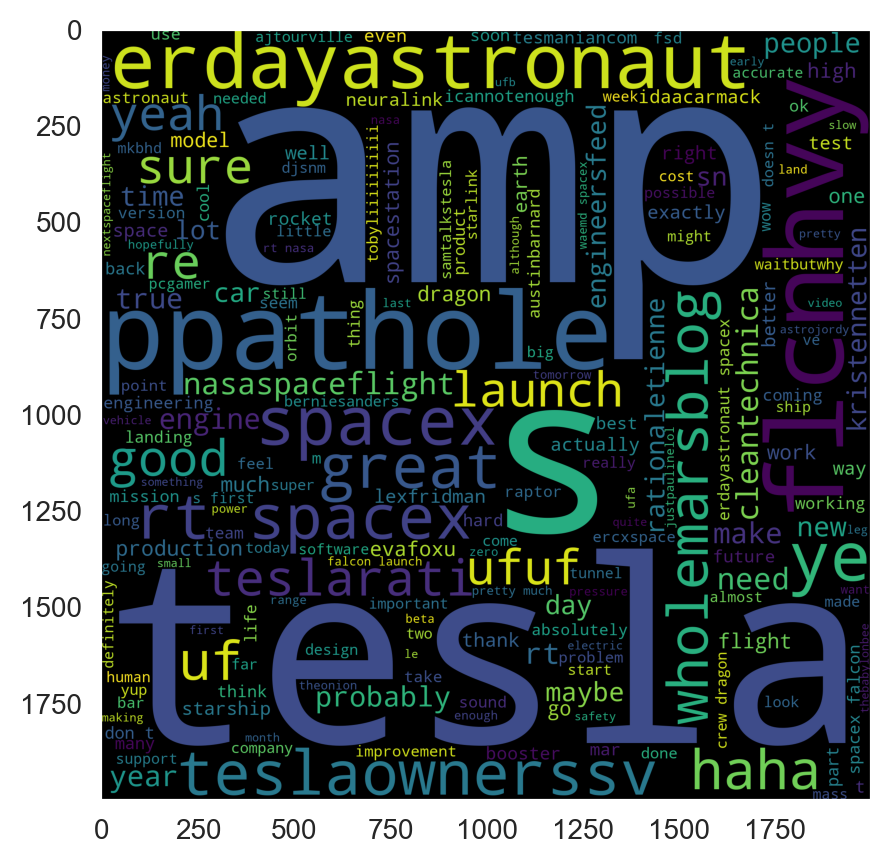

In [30]:
Review_wordcloud = ' '.join(tweets["Tweets"])
Q_wordcloud=WordCloud(
                    background_color='black',
                    width=2000,
                    height=2000
                   ).generate(Review_wordcloud)
plt.axis('on')
plt.imshow(Q_wordcloud)

In [31]:
import collections
from collections import Counter
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [32]:
from textblob import TextBlob
tweets['polarity'] = tweets["Tweets"].apply(lambda x: TextBlob(x).sentiment[0])
tweets[['Tweets','polarity']].head(10)

,Tweets,polarity
1,kunalb im alien,-0.250000
2,idaacarmack ray tracing cyberpunk hdr nextleve...,0.000000
3,joerogan spotify great interview,0.800000
4,gtera doge underestimated,0.000000
5,teslacn congratulation tesla china amazing exe...,0.200000
6,happy new year ox httpstcowfkmyuoj,0.468182
7,frodo underdoge thought would fail httpstcozgx...,-0.500000
8,owensparks flcnhvy anonyx haha thanks,0.200000
9,flcnhvy anonyx indeed tweet definitely represe...,0.000000
10,entertaining outcome likely,0.250000


### Displaying top 10 positive posts of Category A

In [33]:
tweets[tweets.polarity>0].head(10)

,Text,Tweets,polarity
3,@joerogan @Spotify Great interview!,joerogan spotify great interview,0.800000
5,@teslacn Congratulations Tesla China for amazi...,teslacn congratulation tesla china amazing exe...,0.200000
6,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,happy new year ox httpstcowfkmyuoj,0.468182
8,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),owensparks flcnhvy anonyx haha thanks,0.200000
10,The most entertaining outcome is the most likely,entertaining outcome likely,0.250000
14,@geoffkeighley @UnrealEngine Its getting real,geoffkeighley unrealengine its getting real,0.200000
16,"@JoshManMode He definitely has issues, but the...",joshmanmode definitely issue sentencing seems ...,0.080000
17,@freewalletorg Thanks for fixing,freewalletorg thanks fixing,0.200000
20,This is true power haha https://t.co/Fc9uhQSd7O,true power haha httpstcofcuhqsdo,0.275000
23,RT @SpaceX: NASA has selected Falcon Heavy to ...,rt spacex nasa selected falcon heavy launch fi...,0.025000


In [34]:
tweets = tweets.drop(['Text'], axis = 1)
tweets

,Tweets,polarity
1,kunalb im alien,-0.250000
2,idaacarmack ray tracing cyberpunk hdr nextleve...,0.000000
3,joerogan spotify great interview,0.800000
4,gtera doge underestimated,0.000000
5,teslacn congratulation tesla china amazing exe...,0.200000
...,...,...
1995,flcnhvy true sound surreal negative propaganda...,0.152381
1996,ppathole make sure read ur term amp condition ...,0.500000
1997,teslagong ppathole samwise gamgee,0.000000
1998,ppathole altho dumb dumber ufuf,-0.375000


In [35]:
def sent_type(Tweets): 
    for i in (Tweets):
        if i>0:
            print('positive')
        elif i==0:
            print('neutral')
        else:
            print('negative')

In [36]:
sent_type(tweets['polarity'])

negative
neutral
positive
neutral
positive
positive
negative
positive
neutral
positive
neutral
neutral
neutral
positive
neutral
positive
positive
neutral
neutral
positive
neutral
neutral
positive
neutral
positive
negative
negative
neutral
neutral
neutral
neutral
neutral
negative
neutral
positive
positive
positive
neutral
neutral
neutral
neutral
positive
positive
neutral
neutral
neutral
positive
neutral
neutral
neutral
positive
neutral
positive
neutral
neutral
neutral
neutral
positive
neutral
neutral
neutral
neutral
neutral
neutral
positive
positive
neutral
neutral
positive
neutral
neutral
neutral
positive
positive
positive
neutral
neutral
neutral
neutral
positive
positive
neutral
neutral
neutral
neutral
neutral
neutral
negative
neutral
neutral
positive
neutral
neutral
positive
positive
neutral
neutral
positive
negative
neutral
neutral
positive
neutral
neutral
positive
negative
positive
positive
positive
neutral
neutral
neutral
positive
neutral
neutral
positive
positive
positive
neutral

In [37]:
tweets["category"]=tweets['polarity']

tweets.loc[tweets.category > 0,'category']="Positive"
tweets.loc[tweets.category !='Positive','category']="Negative"

tweets["category"]=tweets["category"].astype('category')
tweets.dtypes

Tweets        object
polarity     float64
category    category
dtype: object

In [38]:
tweets.category.value_counts(normalize=True).mul(100)

Negative    57.778889
Positive    42.221111
Name: category, dtype: float64

## Inference: 
According to the wordcloud that we have created , the tweets have 58% Negative words and 42% Positive words
 